# PHYS414 Final Project
### Melih Kayra Kadıoğlu
### 82985

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp               # ODE solver
from scipy.interpolate import UnivariateSpline

### Newtonian Approach
---------------------------------------------------------------------------------------------------------------------------------------

### a.1: Derivation of Lane Emden Equation

We can start from Newtonian hydrostatic equilibrium and mass conservation given in the introduction:
$$
\frac{dm}{dr}=4\pi r^2\rho(r),
\qquad
\frac{dP}{dr}=-\frac{Gm(r)\rho(r)}{r^2}
$$
Since we do not have the information for the density funcitoun, as suggested, we will use a polytropic equation of state (EOS) of such that
$$
P=K\rho^{\gamma}=K\rho^{1+\frac{1}{n}}
$$

Let us define the dimensionless variables
$$
\rho(r)=\rho_c\,\theta(\xi)^n,
\qquad
r=a\,\xi,
\qquad
P(r)=K\rho_c^{1+\frac1n}\,\theta(\xi)^{n+1}
$$
where $\rho_c=\rho(0)$ and $a$ is a constant to be chosen.

Then, 
$$
\frac{dP}{dr}
=K\rho_c^{1+\frac1n}(n+1)\theta^n\frac{d\theta}{dr}
$$
Let us substitute this into hydrostatic equilibrium:
$$
K\rho_c^{1+\frac1n}(n+1)\theta^n\frac{d\theta}{dr}
=
-\frac{Gm\rho_c\theta^n}{r^2}
$$
Now, cancel $\rho_c\theta^n$ to obtain
$$
K(n+1)\rho_c^{\frac1n}\frac{d\theta}{dr}
=
-\frac{Gm}{r^2},
\qquad\Rightarrow\qquad
m(r)=-\frac{K(n+1)\rho_c^{1/n}}{G}\,r^2\frac{d\theta}{dr}
$$
Differentiate this expression and use $\frac{dm}{dr}=4\pi r^2\rho_c\theta^n$:
$$
-\frac{K(n+1)\rho_c^{1/n}}{G}\frac{d}{dr}\!\left(r^2\frac{d\theta}{dr}\right)
=
4\pi r^2\rho_c\theta^n
$$
Divide by $r^2$:
$$
\frac{1}{r^2}\frac{d}{dr}\!\left(r^2\frac{d\theta}{dr}\right)
=
-\frac{4\pi G\rho_c}{K(n+1)\rho_c^{1/n}}\,\theta^n
=
-\frac{4\pi G}{K(n+1)}\,\rho_c^{1-\frac1n}\,\theta^n
$$

Now switch to $\xi$ using $r=a\xi$:
$$
\frac{1}{r^2}\frac{d}{dr}\!\left(r^2\frac{d\theta}{dr}\right)
=
\frac{1}{a^2}\frac{1}{\xi^2}\frac{d}{d\xi}\!\left(\xi^2\frac{d\theta}{d\xi}\right)
$$
Choose $a$ such that
$$
a^2=\frac{(n+1)K}{4\pi G}\,\rho_c^{\frac1n-1}
$$
Then we can get the Lane-Emden equation
$$
\boxed{
\frac{1}{\xi^2}\frac{d}{d\xi}\!\left(\xi^2\frac{d\theta}{d\xi}\right)+\theta^n=0
}
$$
Regularity at the center implies
$$
\theta(0)=1,
\qquad
\theta'(0)=0.
$$

### a.2: Regular solution at the center

To find out the series solution of the regular equation's behaviour at the center, assume an even-power series near $\xi=0$:
$$
\theta(\xi)=1+a\xi^2+b\xi^4+\mathcal O(\xi^6).
$$
Compute
$$
\frac{1}{\xi^2}\frac{d}{d\xi}\!\left(\xi^2\theta'\right)
=6a+20b\xi^2+\mathcal O(\xi^4),
$$
and
$$
\theta^n
=\left(1+a\xi^2+b\xi^4+\cdots\right)^n
=1+na\xi^2+\mathcal O(\xi^4).
$$
Substitute into Lane-Emden:
$$
(6a+20b\xi^2+\cdots)+(1+na\xi^2+\cdots)=0.
$$
Matching coefficients gives
$$
6a+1=0 \Rightarrow a=-\frac16,
\qquad
20b+na=0 \Rightarrow b=\frac{n}{120}.
$$
Hence the regular solution behaves as
$$
\boxed{
\theta(\xi)=1-\frac{1}{6}\xi^2+\frac{n}{120}\xi^4+\cdots
}
$$
and in particular $\theta'(0)=0$.

For $n=1$ the Lane-Emden equation becomes
$$
\frac{1}{\xi^2}\frac{d}{d\xi}\!\left(\xi^2\theta'\right)+\theta=0
\quad\Longleftrightarrow\quad
\theta''+\frac{2}{\xi}\theta'+\theta=0.
$$
The regular solution satisfying $\theta(0)=1$ and $\theta'(0)=0$ is
$$
\boxed{
\theta(\xi)=\frac{\sin\xi}{\xi}
}
$$
Furthermore,
$$
\lim_{\xi\to 0}\frac{\sin\xi}{\xi}=1,
\qquad
\theta'(\xi)=\frac{\xi\cos\xi-\sin\xi}{\xi^2}
\Rightarrow
\theta'(0)=0
$$
The first zero occurs at $\xi_1=\pi$ so the stellar surface is at $\theta(\pi)=0$.

### a.3: Derivation of the mass formula

We will use the Lane-Emden substitutions that we had before
$$
\rho(r)=\rho_c\,\theta(\xi)^n,\qquad r=a\,\xi,\qquad R=a\,\xi_n,\qquad \theta(\xi_n)=0
$$
where $\xi_n$ is the first zero of $\theta$.

The enclosed mass is
$$
m(r)=\int_0^r 4\pi r'^2\rho(r')\,dr'
=4\pi \rho_c \int_0^{a\xi} r'^2 \theta\!\left(\frac{r'}{a}\right)^n dr'
$$
Let $r'=a\xi'$ so that $dr'=a\,d\xi'$ and $r'^2=a^2\xi'^2$:
$$
m(\xi)=4\pi\rho_c a^3\int_0^\xi \xi'^2 \theta(\xi')^n\,d\xi'
$$
Hence the total mass is
$$
M=m(\xi_n)=4\pi\rho_c a^3\int_0^{\xi_n}\xi^2\theta(\xi)^n\,d\xi
$$

Now, start from the Lane-Emden equation such that
$$
\frac{1}{\xi^2}\frac{d}{d\xi}\!\left(\xi^2\theta'\right)+\theta^n=0
\quad\Longrightarrow\quad
\frac{d}{d\xi}\!\left(\xi^2\theta'\right)=-\xi^2\theta^n
$$
Integrate from $0$ to $\xi_n$:
$$
\left[\xi^2\theta'(\xi)\right]_0^{\xi_n}=-\int_0^{\xi_n}\xi^2\theta(\xi)^n\,d\xi
$$
Regularity at the center implies that $\xi^2\theta'(\xi)\to 0$ as $\xi\to 0$, so
$$
\int_0^{\xi_n}\xi^2\theta(\xi)^n\,d\xi = -\xi_n^2\theta'(\xi_n)
$$
Therefore,
$$
M=4\pi\rho_c a^3\left[-\xi_n^2\theta'(\xi_n)\right]
$$
By using $a=R/\xi_n$, resuly yields:
$$
\boxed{
M = 4\pi\rho_c R^3\left(-\frac{\theta'(\xi_n)}{\xi_n}\right)
}
$$

### a.4: Proof that mass is a function of radius

For a polytrope $P=K\rho^{1+1/n}$ one has
$$
a^2=\frac{(n+1)K}{4\pi G}\,\rho_c^{\frac1n-1}
$$
Hence
$$
R=a\xi_n
=\xi_n\left(\frac{(n+1)K}{4\pi G}\right)^{1/2}\rho_c^{\frac{1-n}{2n}}
\quad\Rightarrow\quad
\rho_c=
\left[\frac{R}{\xi_n}\left(\frac{4\pi G}{(n+1)K}\right)^{1/2}\right]^{\frac{2n}{1-n}}
\qquad (n\neq 1)
$$
Insert this into $M=4\pi\rho_c R^3\left(-\theta'(\xi_n)/\xi_n\right)$ to get
$$
\boxed{
M \propto R^{\frac{3-n}{1-n}}
\qquad (n\neq 1)
}
$$

Define the Lane-Emden constant
$$
\omega_n\equiv -\xi_n^2\theta'(\xi_n) \;>\;0.
$$
Then, a convenient explicit proportionality constant is
$$
\boxed{
M
=
4\pi\,\omega_n\,
\xi_n^{-\frac{3-n}{1-n}}
\left(\frac{(n+1)K}{4\pi G}\right)^{\frac{n}{\,n-1\,}}
R^{\frac{3-n}{1-n}}
\qquad (n\neq 1)
}
$$

### b.1: White Dwarf's Mass-Radius relation

Surface gravity:
$$g = \dfrac{G M}{R^2}$$

Solve for radius:
$$R = \sqrt{\dfrac{G M}{g}}$$

The data gives $\log_{10}(g)$ in CGS, so:
$$g = 10^{\log g} ;; [\mathrm{cm,s^{-2}}]$$

Mass is in solar masses:
$$M = \left(\dfrac{M}{M_\odot}\right) M_\odot$$

Thus in CGS:
$$R = \sqrt{\dfrac{G_{\mathrm{cgs}} , (M/M_\odot) , M_\odot}{10^{\log g}}}$$

Convert to Earth radii:
$$\dfrac{R}{R_\oplus} = \dfrac{1}{R_\oplus}\sqrt{\dfrac{G_{\mathrm{cgs}} , (M/M_\odot) , M_\odot}{10^{\log g}}}$$

Constants (CGS):
$$G_{\mathrm{cgs}} = 6.67430\times 10^{-8},\mathrm{cm^3,g^{-1},s^{-2}}$$

$$M_\odot = 1.98847\times 10^{33},\mathrm{g}$$

$$R_\oplus = 6.371\times 10^{8},\mathrm{cm}$$

Therefore, the final form of the formula is:
$$\displaystyle R_{R_\oplus} = \frac{1}{R_\oplus}\sqrt{\frac{G_{\mathrm{cgs}} M_\odot}{10^{\log g}} , M_{\rm WD}}$$
where $M_{\rm WD}$ is the mass column in solar masses.

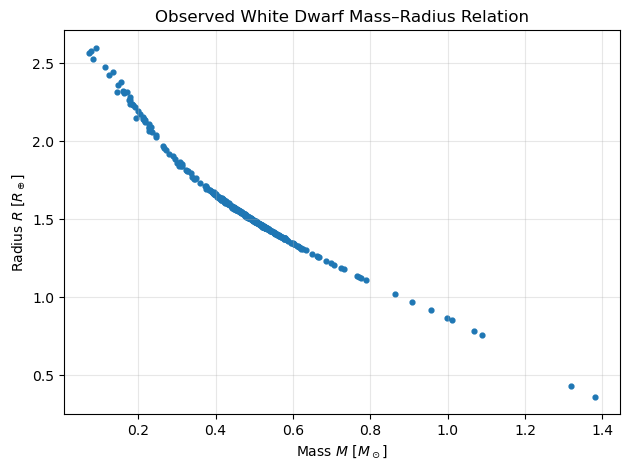

In [14]:
# constants in CGS
G = 6.67430e-8
M_sun = 1.98847e33
R_earth = 6.371e8

# read data 
data = pd.read_csv("white_dwarf_data.csv")

mass_col = [c for c in data.columns if "mass" in c.lower()][0]
logg_col = [c for c in data.columns if "log" in c.lower()][0]

M = pd.to_numeric(data[mass_col], errors="coerce").to_numpy()      # [M_sun]
logg = pd.to_numeric(data[logg_col], errors="coerce").to_numpy()  # log10(g)

valid = np.isfinite(M) & np.isfinite(logg)
M = M[valid]
logg = logg[valid]

# Newtonian radius from log g
g = 10.0**logg                              # cm/s^2
R_cgs = np.sqrt(G * M * M_sun / g)          # cm
R_Rearth = R_cgs / R_earth                 # Earth radii

#plot M vs R
plt.figure()
plt.scatter(M, R_Rearth, s=12)
plt.xlabel(r"Mass $M$ [$M_\odot$]")
plt.ylabel(r"Radius $R$ [$R_\oplus$]")
plt.title("Observed White Dwarf Mass–Radius Relation")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### c.1: Mass-Radius & Central Density-Mass fits

We shall make a small-$x$ expansion of the equation of state for cold WDs to obtain the polytrope form.  
Assume that the EOS for cold WDs is written in the standard degenerate parametric form with a dimensionless parameter $x$ and constants $C,D,q$ such that the density scales as  

$$
\rho = D\,x^q \quad \Rightarrow \quad x = \left(\frac{\rho}{D}\right)^{1/q}.
$$

For low-mass WDs, $x\ll 1$. The pressure function expands as  

$$
P(x) = C\,F(x),
$$

with the leading term  

$$
F(x) = \frac{8}{5}x^5 + O(x^7).
$$

Therefore,

$$
P \simeq C\,\frac{8}{5}x^5
      = \frac{8C}{5}\left(\frac{\rho}{D}\right)^{5/q}
      = \frac{8C}{5D^{5/q}}\rho^{5/q}.
$$

Comparing to the polytropic form  

$$
P = K_* \,\rho^{1+\frac{1}{n_*}},
$$

we identify the exponent

$$
1+\frac{1}{n_*} = \frac{5}{q}.
$$

Solving for $n_*$ gives

$$
\frac{1}{n_*} = \frac{5}{q}-1 = \frac{5-q}{q},
\qquad
n_* = \frac{q}{5-q},
$$

and matching the prefactor yields

$$
K_* = \frac{8C}{5D^{5/q}}.
$$

Thus,

$$
n_* = \frac{q}{5-q},
\qquad
K_* = \frac{8C}{5D^{5/q}}.
$$

For a polytrope $P = K\rho^{1+1/n}$, define

$$
a^2 = \frac{(n+1)K}{4\pi G}\,\rho_c^{\frac{1}{n}-1}.
$$

The Lane–Emden solution $\theta(\xi)$ gives the first zero $\xi_1$ and

$$
\omega_n \equiv -\xi_1^2\theta'(\xi_1).
$$

Then

$$
R = a\,\xi_1,
$$

and

$$
M = 4\pi a^3 \rho_c\,\omega_n.
$$

Eliminating $\rho_c$ gives the low-mass power-law mass–radius relation

$$
R = \mathcal{A}(n)\,K^{\frac{n}{3-n}}\,M^{\frac{1-n}{3-n}},
$$

where

$$
\mathcal{A}(n)
= \xi_1\,(4\pi\omega_n)^{-\frac{1-n}{3-n}}
  \left(\frac{n+1}{4\pi G}\right)^{\frac{n}{3-n}}.
$$

Once $n$ and $K$ are fixed, the central density of each star is

$$
\rho_c
=
\left[
\frac{M}{4\pi\omega_n}
\left(\frac{4\pi G}{(n+1)K}\right)^{3/2}
\right]^{\frac{2n}{3-n}}.
$$

Hard cutoff Mmax = 0.45 Msun | fit subset size = 130
beta = -0.3413128573598856
n_real = 1.5089235602075624 | q_real = 3.0071134572205334 | using integer q = 3
Using n_* = 1.5
xi1 = 3.6537537362296484 | omega_n = 2.714055122797973
K_* (CGS) = 2791233246288.6675


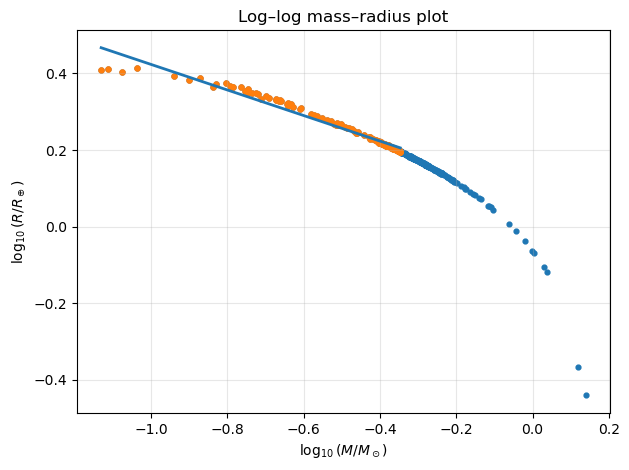

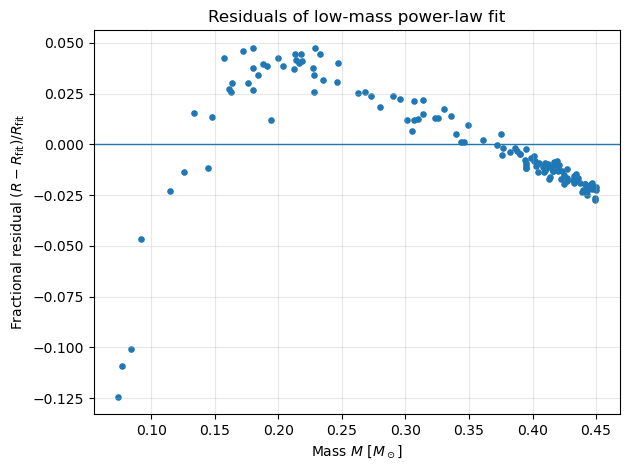

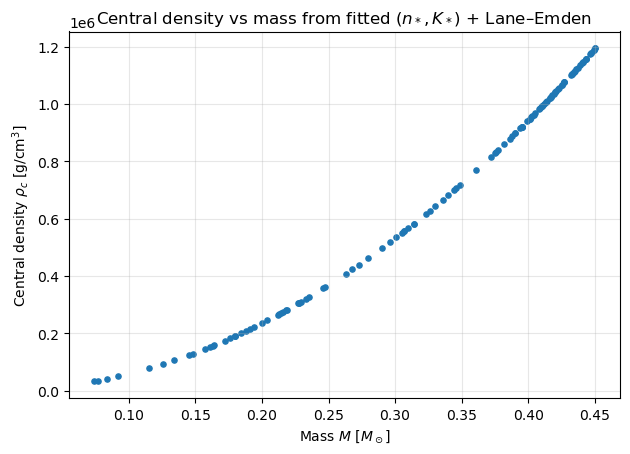

In [23]:
M = np.asarray(M)                                     # [Msun]
R_cgs = np.asarray(R_cgs)                             # [cm]
R_Rearth = np.asarray(R_Rearth)                       # [Rearth]

idx = np.argsort(M)                                   # sort so low masses come first
M = M[idx]
R_cgs = R_cgs[idx]
R_Rearth = R_Rearth[idx]

# for the sake of clarity, we choose low-mass subset by a cutoff
Mmax = 0.45                                            # Msun  (adjust if you want)
mask_fit = (M <= Mmax)                                 # choose low-mass stars only

Mfit = M[mask_fit]                                     # [Msun]
Rfit_cgs = R_cgs[mask_fit]                             # [cm]
Rfit_Rearth = R_Rearth[mask_fit]                       # [Rearth]

print("Hard cutoff Mmax =", Mmax, "Msun | fit subset size =", len(Mfit))

# fit slope beta from ln R = c0 + beta ln M
x = np.log(Mfit)                                       # ln(M/Msun)
y = np.log(Rfit_cgs)                                   # ln(R/cm)
A = np.vstack([np.ones_like(x), x]).T
(c0, beta), *_ = np.linalg.lstsq(A, y, rcond=None)

# slope -> n_real -> q_real
n_real = (1.0 - 3.0*beta) / (1.0 - beta)               # beta = (1-n)/(3-n)
q_real = 5.0 * n_real / (n_real + 1.0)                 # 1+1/n = 5/q

# enforce integer q and lock n_* from it
q_int = int(np.rint(q_real))                            # nearest integer
if q_int not in [1, 2, 3, 4]:
    q_int = 3                                           # hint expects q=3
n = q_int / (5.0 - q_int)                               # n_* = q/(5-q)

print("beta =", beta)
print("n_real =", n_real, "| q_real =", q_real, "| using integer q =", q_int)
print("Using n_* =", n)

if n >= 5.0:
    raise ValueError(f"n_* = {n} >= 5 (no finite surface). Lower Mmax or re-check fit.")

# robust Lane–Emden solver
def lane_emden_constants(n, xi_max=200.0):
    eps = 1e-8
    y0 = [1.0 - eps**2/6.0, -eps/3.0]                  # [theta, dtheta/dxi]

    def rhs(xi, y):
        theta, dtheta = y
        theta_pos = theta if theta > 0.0 else 0.0      # avoid negative^fractional
        ddtheta = -(2.0/xi)*dtheta - theta_pos**n
        return [dtheta, ddtheta]

    def surface(xi, y):
        return y[0]                                    # theta=0 surface
    surface.terminal = True
    surface.direction = -1

    sol = solve_ivp(rhs, (eps, xi_max), y0, events=surface,
                    rtol=1e-10, atol=1e-12, max_step=0.05)

    if len(sol.t_events[0]) == 0:
        raise RuntimeError("Lane–Emden did not hit theta=0 (increase xi_max or check n).")

    xi1 = sol.t_events[0][0]
    theta1, dtheta1 = sol.y_events[0][0]
    omega_n = -xi1**2 * dtheta1
    return xi1, omega_n

xi1, omega_n = lane_emden_constants(n)
print("xi1 =", xi1, "| omega_n =", omega_n)

# model: R = A(n) * K^{n/(3-n)} * M^{(1-n)/(3-n)}   with M in grams, R in cm
p = n/(3.0 - n)                                       # exponent of K
s = (1.0 - n)/(3.0 - n)                               # exponent of M

A_n = xi1 * (4.0*np.pi*omega_n)**(-s) * ((n+1.0)/(4.0*np.pi*G))**p

Mfit_cgs = Mfit * M_sun                               # g

# ln R = ln A_n + p ln K + s ln M  => ln K from mean residual
lnK = np.mean((np.log(Rfit_cgs) - np.log(A_n) - s*np.log(Mfit_cgs)) / p)
K_star = np.exp(lnK)

print("K_* (CGS) =", K_star)

# here we compute central densities rho_c for the fit subset
A0 = (n+1.0) * K_star / (4.0*np.pi*G)                 # (n+1)K/(4piG)
rho_c = (Mfit_cgs / (4.0*np.pi*omega_n * A0**1.5))**(2.0*n/(3.0-n))  # g/cm^3

# to fit the curve for overlay
Mgrid = np.linspace(Mfit.min(), Mfit.max(), 300)       # Msun
Mgrid_cgs = Mgrid * M_sun                              # g
Rmodel_cgs = A_n * (K_star**p) * (Mgrid_cgs**s)         # cm
Rmodel_Rearth = Rmodel_cgs / R_earth                    # Rearth

# plot 1: log-log MR with fit subset + overlay curve
plt.figure()
plt.scatter(np.log10(M), np.log10(R_Rearth), s=12)                      # all data
plt.scatter(np.log10(Mfit), np.log10(Rfit_Rearth), s=14)                # fit subset
plt.plot(np.log10(Mgrid), np.log10(Rmodel_Rearth), linewidth=2)         # fitted power law
plt.xlabel(r"$\log_{10}(M/M_\odot)$")
plt.ylabel(r"$\log_{10}(R/R_\oplus)$")
plt.title("Log–log mass–radius plot")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# plot 2: residuals on the fit subset 
Rmodel_on_fit_cgs = A_n * (K_star**p) * (Mfit_cgs**s)                    # model at fit points
frac_resid = (Rfit_cgs - Rmodel_on_fit_cgs) / Rmodel_on_fit_cgs          # fractional residual

plt.figure()
plt.scatter(Mfit, frac_resid, s=14)
plt.axhline(0.0, linewidth=1)
plt.xlabel(r"Mass $M$ [$M_\odot$]")
plt.ylabel(r"Fractional residual $(R - R_{\rm fit})/R_{\rm fit}$")
plt.title("Residuals of low-mass power-law fit")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# plot 3: rho_c vs M for stars used in fit
plt.figure()
plt.scatter(Mfit, rho_c, s=14)
plt.xlabel(r"Mass $M$ [$M_\odot$]")
plt.ylabel(r"Central density $\rho_c$ [g/cm$^3$]")
plt.title(r"Central density vs mass from fitted $(n_*,K_*)$ + Lane–Emden")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

$
\textbf{(plot-1) Log–log } M\text{–}R \text{ with fit:}
\text{For low masses the points lie almost on a straight line in log–log scale,}
$
$
\text{which means the radius follows a simple power law } R\propto M^\beta,
$
$
\text{as expected from a polytropic equation of state. The deviation at higher masses}
$
$
\text{shows where the low-density } (x\ll1) \text{ approximation is no longer valid.}
$

$
\textbf{(plot-2) Residuals:}
\text{The residuals are small in the fitted mass range,}
$
$
\text{so the power-law describes the low-mass white dwarfs reasonably well.}
$
$
\text{The systematic trend near the upper mass limit indicates the breakdown of the}
$
$
\text{simple polytropic behavior.}
$

$
\textbf{(plot-3) Central density vs mass:}
\text{The central density } \rho_c \text{ increases smoothly with mass,}
$
$
\text{which is physically expected since more massive white dwarfs must be more}
$
$
\text{strongly compressed by gravity. This follows directly from the Lane–Emden}
$
$
\text{scaling of a polytropic star with the fitted } (n_*,K_*) \text{ values.}
$

### d.1: Fitting the full degenerate EOS with one parameter D

$
\text{From the low-mass fit we already determined } q,
\text{ and we obtained } K_* \text{ from the polytropic approximation.}
$

$
\text{In the small-}x \text{ limit the EOS becomes } P \simeq \frac{8C}{5}x^5,
\qquad \rho = D x^q \Rightarrow x = \left(\frac{\rho}{D}\right)^{1/q}.
$

$
\Rightarrow\;
P \simeq \frac{8C}{5}\left(\frac{\rho}{D}\right)^{5/q}
= \left(\frac{8C}{5D^{5/q}}\right)\rho^{5/q}.
$

$
\text{Comparing with } P = K_* \rho^{1+1/n_*} \text{ and } 1+\frac{1}{n_*}=\frac{5}{q},
\text{ we identify }
K_* = \frac{8C}{5D^{5/q}}
\;\Rightarrow\;
C = \frac{5K_*}{8}\,D^{5/q}.
$

$
\text{Therefore, once } q \text{ and } K_* \text{ are known, the full EOS has only one unknown: } D.
$

$
\text{For a given trial } D,\; C(D)=\frac{5K_*}{8}D^{5/q}\text{ is fixed, and we can compute a theoretical }
(M,R)\text{ curve by solving the Newtonian structure IVP:}
$

$
\frac{dm}{dr}=4\pi r^2\rho,\qquad
\frac{dP}{dr}=-\frac{Gm\rho}{r^2},\qquad
P=P(\rho;C(D),D).
$

$
\text{To avoid root-finding for each data radius, we do the following:}
$

$
\text{(i) Choose } N_s \text{ central densities } \rho_{c,i}\text{ (e.g. }N_s=20\text{) to generate }
N_s \text{ model stars by solving the IVP, giving sample points } (R_i,M_i).
$

$
\text{(ii) Build an interpolant } \widetilde{M}(R;D)\text{ from these sample points over the full radius range}
\text{ (a spline interpolation is appropriate since the curve is smooth).}
$

$
\text{(iii) For every observed radius }R_j\text{, predict } M_{\rm pred}(R_j;D)=\widetilde{M}(R_j;D)
\text{ and compute a total error, e.g.}
$

$
E(D)=\sqrt{\frac{1}{N}\sum_{j=1}^N\left[M_{\rm pred}(R_j;D)-M_j\right]^2 }.
$

$
\text{(iv) Repeat for many } D \text{ values and choose } D_{\rm best}=\arg\min_D E(D).
$

$
\text{Finally, compare } C \text{ and } D \text{ with the theoretical values (for }\mu_e=2\text{):}
\qquad
C_{\rm th}=\frac{m_e^4c^5}{24\pi^2\hbar^3},
\qquad
D_{\rm th}=\frac{m_um_e^3c^3\mu_e}{3\pi^2\hbar^3}.
$

/var/folders/62/dfvj9nz52cs65rm5md684nk80000gn/T/ipykernel_70000/955027960.py:51: RuntimeWarning: divide by zero encountered in scalar divide
  drho = -(G*m*rho/(r*r)) / dp                 # dρ/dr = (dP/dr)/(dP/dρ)


q = 3 | K_* = 2791233246288.6675
D_best = 843183.972248634 | RMS error = 0.16985942587201136 Msun
C_best = 1.312844788060494e+22
Compare: D_best/D_th = 0.43287612810830584 | C_best/C_th = 0.2187224473819797


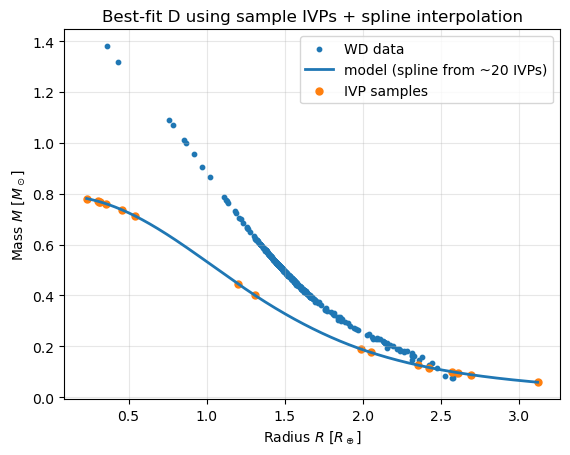

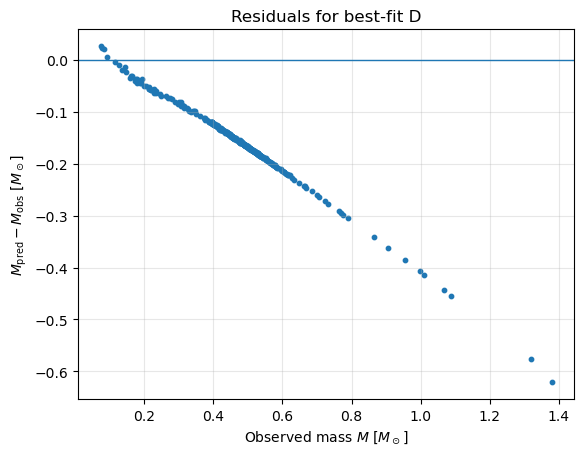

In [29]:
M_data = np.asarray(M, dtype=float)                 # Msun
R_data = np.asarray(R_cgs, dtype=float)             # cm

q = int(q_int) if "q_int" in globals() else 3       # from part (c), integer
Kstar = float(K_star)                               # from part (c), CGS

# sort by radius
ordr = np.argsort(R_data)
R_data = R_data[ordr]
M_data = M_data[ordr]

Rmin, Rmax = float(R_data.min()), float(R_data.max())

# EOS: rho = D x^q,  P = C(D) F(x) 
def F(x):
    return x*(2.0*x*x - 3.0)*np.sqrt(1.0 + x*x) + 3.0*np.arcsinh(x)

def dFdx(x):
    s = np.sqrt(1.0 + x*x)
    return (6.0*x*x - 3.0)*s + x*(2.0*x*x - 3.0)*(x/s) + 3.0/s

def C_of_D(D):
    # from matching low-x polytrope: C = (5/8) K_* D^{5/q}
    return (5.0*Kstar/8.0) * D**(5.0/q)

def dPdrho(rho, D):
    # P = C(D) F(x), x=(rho/D)^(1/q)
    x = (rho/D)**(1.0/q)
    dPdx = C_of_D(D) * dFdx(x)
    dxdrho = (1.0/q) * (1.0/D) * (rho/D)**(1.0/q - 1.0)
    return dPdx * dxdrho

# integrate one star for given (D, rho_c)
_star_cache = {}                                   # speed: cache repeated solves

def integrate_star(D, rho_c):
    key = (float(D), float(rho_c))
    if key in _star_cache:
        return _star_cache[key]

    r0 = 1e4                                        # in cm, start away from 0 to avoid 0/0
    m0 = (4.0*np.pi/3.0) * rho_c * r0**3             # series: m ~ 4πρ r^3/3
    y0 = [m0, rho_c]                                 # [m, rho]

    def rhs(r, y):
        m, rho = y
        if rho <= 0.0:
            return [0.0, 0.0]
        dm = 4.0*np.pi*r*r*rho
        dp = dPdrho(rho, D)
        drho = -(G*m*rho/(r*r)) / dp                 # dρ/dr = (dP/dr)/(dP/dρ)
        return [dm, drho]

    def surface(r, y):
        return y[1]                                  # stop when rho hits 0
    surface.terminal = True
    surface.direction = -1

    rmax = 8.0 * Rmax                                # upper bound

    sol = solve_ivp(
        rhs, (r0, rmax), y0,
        events=surface,
        method="RK23",                               # because it is faster than RK45
        rtol=1e-6, atol=1e-8,                        # relaxed tolerances
        max_step=8e7                                 # step size
    )

    if len(sol.t_events[0]) == 0:
        _star_cache[key] = None
        return None

    Rstar = sol.t_events[0][0]
    Mstar = sol.y_events[0][0][0]
    out = (Rstar, Mstar)
    _star_cache[key] = out
    return out

# build ~Ns sample (R,M) points and spline M(R) for a given D
def build_spline_M_of_R(D, Ns=12, rho_lo=1e4, rho_hi=1e10):
    # scan rho_c in log space
    rho_grid = np.logspace(np.log10(rho_lo), np.log10(rho_hi), Ns*8)

    Rs, Ms = [], []
    for rho_c in rho_grid:
        out = integrate_star(D, rho_c)
        if out is None:
            continue
        Rstar, Mstar = out

        # let us set a wide range so we almost always cover data range for D
        if (Rstar >= 0.6*Rmin) and (Rstar <= 1.4*Rmax):
            Rs.append(Rstar)
            Ms.append(Mstar/M_sun)                   # convert to Msun

        if len(Rs) >= Ns:
            break

    if len(Rs) < 6:
        return None

    Rs = np.asarray(Rs, dtype=float)
    Ms = np.asarray(Ms, dtype=float)

    srt = np.argsort(Rs)
    Rs = Rs[srt]
    Ms = Ms[srt]

    # remove duplicates in R
    Ru, idx = np.unique(Rs, return_index=True)
    Mu = Ms[idx]
    if len(Ru) < 6:
        return None

    spl = UnivariateSpline(Ru, Mu, s=0)              # exact spline
    return spl, (Ru, Mu)

# for valid splines we now will calculate RMS error for one D
def rms_error_for_D(D, Ns=12):
    built = build_spline_M_of_R(D, Ns=Ns)
    if built is None:
        return np.inf, None

    spl, (Rs, Ms) = built
    good = (R_data >= Rs.min()) & (R_data <= Rs.max())
    if np.sum(good) < 20:
        return np.inf, None

    M_pred = spl(R_data[good])
    err = np.sqrt(np.mean((M_pred - M_data[good])**2))
    return err, (spl, Rs, Ms, good)

# for comparison let us define these
hbar = 1.054571817e-27                             # erg*s
c = 2.99792458e10                                  # cm/s
m_e = 9.1093837015e-28                              # g
m_u = 1.66053906660e-24                             # g
mu_e = 2.0

D_th = (m_u * m_e**3 * c**3 * mu_e) / (3.0*np.pi**2 * hbar**3)
C_th = (m_e**4 * c**5) / (24.0*np.pi**2 * hbar**3)

# grid search
Ns_search = 10                                      # fewer IVPs per D while searching

D_grid1 = D_th * np.logspace(-0.6, 0.6, 12)         # coarse case
best = (np.inf, None, None)

for D_try in D_grid1:
    err, pack = rms_error_for_D(D_try, Ns=Ns_search)
    if err < best[0]:
        best = (err, D_try, pack)

if best[1] is None:
    raise RuntimeError("Coarse grid produced no valid model. Widen rho_hi or radius window.")

err1, D1, pack1 = best

D_grid2 = D1 * np.logspace(-0.2, 0.2, 12)           # refined
best = (np.inf, None, None)

for D_try in D_grid2:
    err, pack = rms_error_for_D(D_try, Ns=Ns_search)
    if err < best[0]:
        best = (err, D_try, pack)

err_best, D_best, pack_best = best
spl_best, Rs_samp, Ms_samp, good = pack_best

# rebuild once with nicer Ns for final curve/plot
rebuilt = build_spline_M_of_R(D_best, Ns=20)
if rebuilt is not None:
    spl_best, (Rs_samp, Ms_samp) = rebuilt
    good = (R_data >= Rs_samp.min()) & (R_data <= Rs_samp.max())

C_best = C_of_D(D_best)

print("q =", q, "| K_* =", Kstar)
print("D_best =", D_best, "| RMS error =", err_best, "Msun")
print("C_best =", C_best)
print("Compare: D_best/D_th =", D_best/D_th, "| C_best/C_th =", C_best/C_th)

# plots of data + IVP samples + spline model
R_plot = np.linspace(Rs_samp.min(), Rs_samp.max(), 400)
M_plot = spl_best(R_plot)

plt.figure()
plt.scatter(R_data/R_earth, M_data, s=10, label="WD data")
plt.plot(R_plot/R_earth, M_plot, linewidth=2, label="model (spline from ~20 IVPs)")
plt.scatter(Rs_samp/R_earth, Ms_samp, s=25, label="IVP samples")
plt.xlabel(r"Radius $R$ [$R_\oplus$]")
plt.ylabel(r"Mass $M$ [$M_\odot$]")
plt.title("Best-fit D using sample IVPs + spline interpolation")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

# residuals in mass (only where spline valid)
M_pred = np.full_like(M_data, np.nan, dtype=float)
M_pred[good] = spl_best(R_data[good])

plt.figure()
plt.scatter(M_data[good], M_pred[good] - M_data[good], s=10)
plt.axhline(0.0, linewidth=1)
plt.xlabel(r"Observed mass $M$ [$M_\odot$]")
plt.ylabel(r"$M_{\rm pred}-M_{\rm obs}$ [$M_\odot$]")
plt.title("Residuals for best-fit D")
plt.grid(alpha=0.3)
plt.show()


### e.1: Chandrasekhar mass

$
\text{For Large-}x, \text{ i.e. (ultra-relativistic, ) limit and }n=3:
$
$$
P(x)=C\,F(x), \qquad
F(x)=x(2x^2-3)\sqrt{1+x^2}+3\,\mathrm{asinh}(x).
$$
$
\text{From the Mathematica series at }x\to\infty:\qquad
F(x)=2x^4-2x^2+3\ln(2x)+\cdots
\;\;\Rightarrow\;\;
P(x)\simeq 2C\,x^4 \quad (x\gg 1).
$
$$
\rho = D x^q \;\Rightarrow\; x=\left(\frac{\rho}{D}\right)^{1/q}.
\quad\text{With }q=3:\quad
x=\left(\frac{\rho}{D}\right)^{1/3}.
$$
$$
P \simeq 2C\left(\frac{\rho}{D}\right)^{4/3}
= \underbrace{\frac{2C}{D^{4/3}}}_{K_{\rm rel}}\,\rho^{4/3}.
$$
$
\text{Comparing with the polytrope form }P=K\,\rho^{1+1/n}:
\qquad
1+\frac{1}{n}=\frac{4}{3}
\;\Rightarrow\;
n=3,
\qquad
K=K_{\rm rel}=\frac{2C}{D^{4/3}}.
$

$
\text{Chandrasekhar mass from the }n=3\text{ polytrope:}
$
$$
a^2=\frac{(n+1)K}{4\pi G}\,\rho_c^{\frac{1}{n}-1},
\qquad
R=a\,\xi_1,
\qquad
M=4\pi a^3\rho_c\,\omega_n,
\qquad
\omega_n\equiv-\xi_1^2\theta'(\xi_1).
$$
$$
\text{For }n=3:\;
a^2=\frac{4K}{4\pi G}\rho_c^{-2/3}=\frac{K}{\pi G}\rho_c^{-2/3}
\;\Rightarrow\;
a^3\rho_c=\left(\frac{K}{\pi G}\right)^{3/2},
\;\Rightarrow\;
M=4\pi\omega_3\left(\frac{K}{\pi G}\right)^{3/2}.
$$
$$
\therefore\;
M_{\rm Ch}
=
4\pi\omega_3\left(\frac{K_{\rm rel}}{\pi G}\right)^{3/2}
=
\frac{4\pi\omega_3}{\pi^{3/2}}\left(\frac{K_{\rm rel}}{G}\right)^{3/2}
=
\frac{4\omega_3}{\sqrt{\pi}}\left(\frac{K_{\rm rel}}{G}\right)^{3/2}.
$$
$$
\text{Using }K_{\rm rel}=\frac{2C}{D^{4/3}}:\qquad
M_{\rm Ch}
=
\frac{4\omega_3}{\sqrt{\pi}}
\left(\frac{2C}{G\,D^{4/3}}\right)^{3/2}.
$$

$
\text{If we also use the exact theory constants (your Eq. 11) with }\mu_e=2:
$
$$
C=\frac{m_e^4c^5}{24\pi^2\hbar^3},
\qquad
D=\frac{m_u m_e^3 c^3 \mu_e}{3\pi^2\hbar^3}
\quad\Rightarrow\quad
M_{\rm Ch}=\frac{\omega_3}{2}\sqrt{3\pi}\,
\frac{(\hbar c/G)^{3/2}}{m_u^2\mu_e^2}.
$$

IVP failures: 80 out of 160
IVP successes: 80
Numerical M_Ch from full M(R): 0.7940305332334768 Msun
Radius at M_Ch: 0.06402207945019339 R_earth
Analytic M_Ch (fit-consistent, n=3) = 0.7949682058280862 Msun
Ratio (numerical/analytic) = 0.9988204904451082


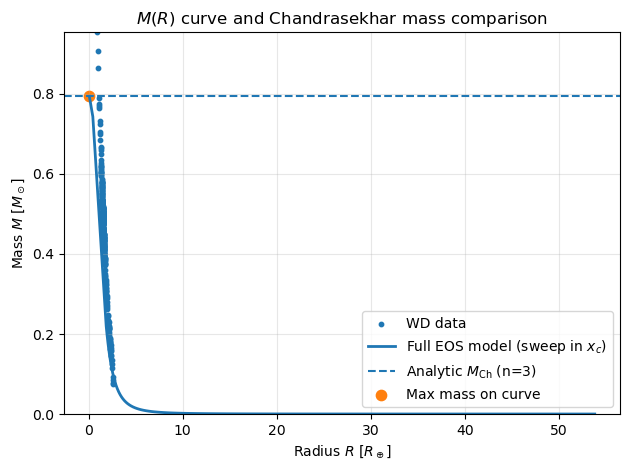

In [35]:
assert int(q) == 3, "Part (e) expects q = 3."
for name in ["G", "M_sun", "R_earth", "K_star", "D_best"]:
    if name not in globals():
        raise NameError(f"Missing '{name}' from previous parts.")

# overlay WD data
have_data = ("M" in globals()) and ("R_cgs" in globals())

# full EOS in x with stable small-x / large-x handling
# rho = D x^3
# P   = C(D) F(x),  C(D) = (5 K_*/8) D^(5/3) from low-mass matching

def C_of_D(D):
    return (5.0 * K_star / 8.0) * (D ** (5.0 / 3.0))

def F_stable(x):
    x = float(x)
    if x < 1e-3:                                  # small-x series (nonrelativistic)
        # F(x) = (8/5)x^5 - (4/7)x^7 + O(x^9)
        return (8.0/5.0)*x**5 - (4.0/7.0)*x**7
    if x > 1e3:                                   # large-x asymptotic (ultra-relativistic)
        # F(x) ~ 2 x^4 
        return 2.0*x**4
    # exact expression in the safe middle region
    return x*(2.0*x*x - 3.0)*np.sqrt(1.0 + x*x) + 3.0*np.arcsinh(x)

def dFdx_stable(x):
    x = float(x)
    if x < 1e-3:                                  # derivative of the small-x series
        # dF/dx = 8 x^4 - 4 x^6 + O(x^8)
        return 8.0*x**4 - 4.0*x**6
    if x > 1e3:                                   # derivative of 2x^4
        return 8.0*x**3
    s = np.sqrt(1.0 + x*x)
    return (6.0*x*x - 3.0)*s + x*(2.0*x*x - 3.0)*(x/s) + 3.0/s

# IVP: integrate star in (m, x) with adaptive rmax 
def integrate_star_x(D, x_c, x_tol=1e-10):
    # Convert x -> rho quickly (q=3)
    C = C_of_D(D)

    eps = 1e-2                                                 # cm (tiny start)
    rho_c = D * (x_c**3)                                       # g/cm^3
    m0 = (4.0*np.pi/3.0) * rho_c * eps**3                       # series: m ~ 4πρ r^3/3
    y0 = [m0, x_c]                                             # [m(eps), x(eps)]

    def rhs(r, y):
        m, x = y
        if x <= 0.0:
            return [0.0, 0.0]

        rho = D * (x**3)                                       # rho(x)
        dm = 4.0*np.pi*r*r*rho                                 # dm/dr

        # hydrostatic: dP/dr = -G m rho / r^2
        dPdr = -G * m * rho / (r*r)

        # chain rule: dP/dr = (dP/dx) dx/dr with P = C F(x)
        dPdx = C * dFdx_stable(x)

        # should not happen for x>0
        if not np.isfinite(dPdx) or dPdx <= 0.0:
            return [0.0, 0.0]

        dx = dPdr / dPdx
        return [dm, dx]

    def surface_event(r, y):
        return y[1] - x_tol                                     # we will stop when x hits a tiny threshold
    surface_event.terminal = True
    surface_event.direction = -1

    # Adaptive rmax to keep increasing until we hit the surface or give up
    rmax = 5.0e8                                               # start modestly
    for _ in range(10):                                        # at most 10 expansions
        sol = solve_ivp(rhs, (eps, rmax), y0,
                        events=surface_event,
                        rtol=1e-7, atol=1e-10,
                        max_step=rmax/2000.0)                   # limit step so that we don't skip the event

        if len(sol.t_events[0]) > 0:
            Rstar = sol.t_events[0][0]
            Mstar = sol.y_events[0][0][0]
            return Rstar, Mstar

        # if x is still not small at rmax, expand domain
        x_end = sol.y[1, -1]
        if not np.isfinite(x_end):
            return None

        # if we are clearly decreasing but not reached surface, extend radius
        if x_end > x_tol:
            rmax *= 2.0
            continue

        return None

    return None

# sweep x_c to build full M(R) curve
x_c_grid = np.logspace(-3, 3, 160)  # covers nonrelativistic -> relativistic

R_model = []
M_model = []
fail = 0

for x_c in x_c_grid:
    out = integrate_star_x(D_best, x_c)
    if out is None:
        fail += 1
        continue
    R_cgs_out, M_cgs_out = out
    R_sc = R_cgs_out / R_earth                                  # Convert integrate_star output to (R/Rearth, M/Msun).
    M_sc = M_cgs_out / M_sun
    if np.isfinite(R_sc) and np.isfinite(M_sc) and (R_sc > 0) and (M_sc > 0):
        R_model.append(R_sc)
        M_model.append(M_sc)

R_model = np.asarray(R_model)
M_model = np.asarray(M_model)

print("IVP failures:", fail, "out of", len(x_c_grid))
print("IVP successes:", len(R_model))

if len(R_model) < 20:
    raise RuntimeError("Still too few points — check that D_best is sensible and that part (d) produced a valid fit.")

# sort by radius for a clean curve
srt = np.argsort(R_model)
R_model = R_model[srt]
M_model = M_model[srt]

# numerical Chandrasekhar mass = maximum of the curve
i_max = int(np.argmax(M_model))
MCh_num = float(M_model[i_max])
R_at_MCh = float(R_model[i_max])

print("Numerical M_Ch from full M(R):", MCh_num, "Msun")
print("Radius at M_Ch:", R_at_MCh, "R_earth")

# analytic Chandrasekhar mass from n=3 polytrope 
# x>>1: F(x) ~ 2 x^4 so P ~ 2C x^4 ; rho = D x^3 => P = (2C/D^(4/3)) rho^(4/3)
C_best = C_of_D(D_best)                                        # fit-consistent C(D)
K_rel = 2.0 * C_best / (D_best ** (4.0 / 3.0))

omega_3 = 2.018236                                             # standard Lane–Emden value for n=3

MCh_ana_cgs = (4.0 * omega_3 / np.sqrt(np.pi)) * (K_rel / G) ** 1.5
MCh_ana = MCh_ana_cgs / M_sun

print("Analytic M_Ch (fit-consistent, n=3) =", MCh_ana, "Msun")
print("Ratio (numerical/analytic) =", MCh_num / MCh_ana)

# plot of data + full curve + analytic line + max point 
plt.figure()

if have_data:
    plt.scatter(np.asarray(R_cgs) / R_earth, np.asarray(M), s=10, label="WD data")

plt.plot(R_model, M_model, linewidth=2, label="Full EOS model (sweep in $x_c$)")
plt.axhline(MCh_ana, linestyle="--", linewidth=1.5, label=r"Analytic $M_{\rm Ch}$ (n=3)")
plt.scatter([R_at_MCh], [MCh_num], s=55, label="Max mass on curve")

plt.ylim(0.0, 1.2 * max(M_model.max(), min(MCh_ana, 3.0)))
plt.xlabel(r"Radius $R$ [$R_\oplus$]")
plt.ylabel(r"Mass $M$ [$M_\odot$]")
plt.title(r"$M(R)$ curve and Chandrasekhar mass comparison")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

### Einsteinian Approach
---------------------------------------------------------------------------------------------------------------------------------------

### a.1: TOV integration for the $M$-$R$ curve

We use the parametric polytropic equation of state (EOS)
\begin{align}
p &= K\,\rho_r^{\Gamma},\\
\rho &= \rho_r + \frac{K}{\Gamma-1}\,\rho_r^{\Gamma},
\end{align}
where $\rho_r$ is the rest-mass (baryon) density and $\rho$ is the total energy density. 
The project specifies $\Gamma=1.3569$ and fixes $K$ by giving a reference pressure at a reference $\rho_r$.

In GR hydrostatic equilibrium is governed by the Tolman-Oppenheimer-Volkoff (TOV) equations:
\begin{align}
\frac{dm}{dr} &= 4\pi r^2 \rho,\\
\frac{d\nu}{dr} &= 2\,\frac{m+4\pi r^3 p}{r(r-2m)},\\
\frac{dp}{dr} &= -(\rho+p)\,\frac{m+4\pi r^3 p}{r(r-2m)}
= -\frac12(\rho+p)\frac{d\nu}{dr}.
\end{align}

We integrate from the center $r=0$ to the stellar surface $r=R$ defined by
$$
p(R)=0 \quad \Longleftrightarrow \quad \rho(R)=0,
$$
since the EOS implies $p=0 \Rightarrow \rho_r=0 \Rightarrow \rho=0$.

Central boundary conditions:
We impose the regular center conditions:
$$
m(0)=0,\qquad p(0)=p_c.
$$
The metric potential $\nu$ is defined up to an additive constant (shifting $\nu\to\nu+\text{const}$ does not change
the $(m(r),p(r))$ solution), so we can choose
$$
\nu(0)=0
$$
without loss of generality, and later one may re-normalize the constant so that $\nu(\infty)=0$.

Units and scaling used in code:
We follow the project’s scaling:
$$
M_\odot \ \text{as mass unit},\qquad r_0=\frac{GM_\odot}{c^2}\ \text{as length unit}.
$$
In these units (geometric units), $m$ and $r$ are dimensionless in the code, but correspond to
$$
M = m\,M_\odot,\qquad R = r\,r_0.
$$
When plotting we convert $R$ to km via $R_{\rm km}=r\,r_0/10^3$ and keep $M$ in $M_\odot$.

Producing the $M$--$R$ curve:
We sweep over central pressures (or central $\rho_{r,c}$), and for each choice integrate the TOV IVP outward until
the event $p(r)=0$ occurs. The endpoint gives the pair
$$
M(p_c)=m(R),\qquad R(p_c)=R.
$$
Plotting these points for many $p_c$ values yields the neutron-star $M$-$R$ curve for this EOS.

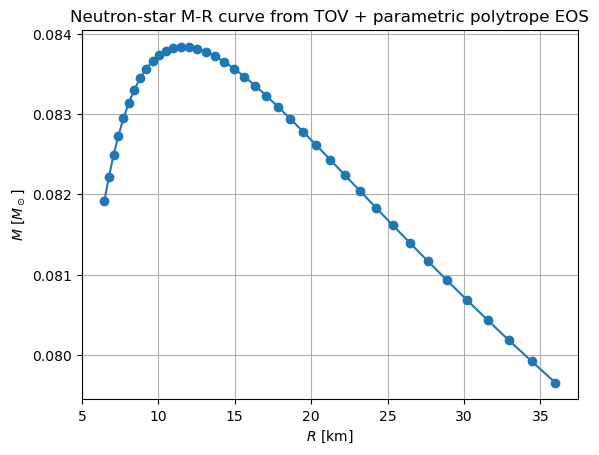

In [37]:
# constants (SI)
G = 6.67430e-11                  # m^3/(kg s^2)
c = 2.99792458e8                 # m/s
M_sun = 1.98847e30               # kg

r_unit = G * M_sun / c**2        # length unit: GM_sun/c^2  [m]
# In these scaled geometric units: r_dimless = r_SI / r_unit, m_dimless = M / M_sun.

# Conversion factors from SI -> scaled geometric units used by the TOV ODEs:
# rho_geom = (G/c^2)*rho_SI  has units 1/m^2, then multiply by r_unit^2 to make it dimensionless.
rho_to_dimless = (G / c**2) * r_unit**2          # multiply rho_SI [kg/m^3] by this -> rho_dimless
p_to_dimless   = (G / c**4) * r_unit**2          # multiply p_SI   [Pa]     by this -> p_dimless

# EOS parameters
Gamma = 1.3569

# Project normalization point
rho_r0_cgs = 1e13                # g/cm^3
p0_cgs = 1.5689e31               # dyn/cm^2 

# Convert normalization point to SI
rho_r0_SI = rho_r0_cgs * 1000.0                  # (g/cm^3) -> (kg/m^3) since 1 g/cm^3 = 1000 kg/m^3
p0_SI     = p0_cgs * 0.1                         # (dyn/cm^2) -> Pa since 1 dyn/cm^2 = 0.1 Pa

# Compute K in SI units from p = K rho_r^Gamma at the reference point
K_SI = p0_SI / (rho_r0_SI**Gamma)                # Pa / (kg/m^3)^Gamma

# dimensionless units: p_dimless = K_dimless * rho_r_dimless^Gamma
# where p_dimless = p_SI * p_to_dimless and rho_r_dimless = rho_r_SI * rho_to_dimless.
K_dimless = (p_to_dimless * K_SI) / (rho_to_dimless**Gamma)

def eos_from_rho_r_dimless(rho_r):
    """Return (p, rho) in dimensionless geometric units from rho_r (dimensionless)."""
    p = K_dimless * rho_r**Gamma
    rho = rho_r + (K_dimless / (Gamma - 1.0)) * rho_r**Gamma
    return p, rho

def rho_r_from_p_dimless(p):
    """Invert p = K rho_r^Gamma for rho_r (dimensionless)."""
    if p <= 0.0:
        return 0.0
    return (p / K_dimless)**(1.0 / Gamma)

# TOV system
def tov_rhs(r, y):
    """
    y = [m, nu, p] in dimensionless units.
    """
    m, nu, p = y
    if p <= 0.0:
        return [0.0, 0.0, 0.0]                    # outside star

    rho_r = rho_r_from_p_dimless(p)               # rest-mass density
    _, rho = eos_from_rho_r_dimless(rho_r)        # total energy density

    if r <= 0.0:
        return [0.0, 0.0, 0.0]                    # regular center

    denom = r * (r - 2.0 * m)
    A = (m + 4.0 * np.pi * r**3 * p) / denom      # common GR factor

    dm = 4.0 * np.pi * r**2 * rho
    dnu = 2.0 * A
    dp = -(rho + p) * A
    return [dm, dnu, dp]

def event_p_zero(r, y):
    """Stop when p hits 0 from above."""
    return y[2]

event_p_zero.terminal = True
event_p_zero.direction = -1

def integrate_star(p_c, r_max=50.0):
    """
    Integrate one NS model for a given central pressure p_c (dimensionless).
    Returns (M_dimless, R_dimless) or (np.nan, np.nan) if it fails.
    """
    r0 = 1e-6                                     # small but nonzero start
    m0 = 0.0
    nu0 = 0.0                                     # gauge choice; shift doesn't affect m(r), p(r)
    y0 = [m0, nu0, p_c]

    sol = solve_ivp(
        tov_rhs,
        t_span=(r0, r_max),
        y0=y0,
        events=event_p_zero,
        rtol=1e-8,
        atol=1e-10,
        max_step=0.05
    )

    if sol.status != 1 or len(sol.t_events[0]) == 0:
        return np.nan, np.nan

    R = sol.t_events[0][0]
    M = sol.y_events[0][0][0]
    return M, R

# sweep to get M-R 
# Choose a sweep in central rest-mass density around nuclear densities (~1e17 kg/m^3 in SI).
rho_r_c_SI_grid = np.logspace(16.5, 18.8, 40)     # tweak if you need wider coverage

# Convert to dimensionless rho_r,c, then to p_c using EOS
rho_r_c_grid = rho_r_c_SI_grid * rho_to_dimless
p_c_grid = K_dimless * rho_r_c_grid**Gamma

Ms, Rs = [], []
for p_c in p_c_grid:
    M, R = integrate_star(p_c, r_max=80.0)
    Ms.append(M)
    Rs.append(R)

Ms = np.array(Ms)                                 # already in M_sun units
Rs = np.array(Rs)                                 # dimensionless radii

# Convert radius to km for plotting, as requested in the project
R_km = Rs * r_unit / 1e3

# plot M-R
mask = np.isfinite(Ms) & np.isfinite(R_km)

plt.figure()
plt.plot(R_km[mask], Ms[mask], marker="o", linestyle="-")
plt.xlabel(r"$R\ \mathrm{[km]}$")
plt.ylabel(r"$M\ [M_\odot]$")
plt.title("Neutron-star M-R curve from TOV + parametric polytrope EOS")
plt.grid(True)
plt.show()


### b.1: Baryonic mass and fractional binding energy

The gravitational mass function $m(r)$ obtained from the TOV system is not equal to the sum of the rest masses
of the particles, because in GR the mass-energy includes internal energy and (negative) gravitational binding energy.
The total rest mass of the particles alone is the \emph{baryonic mass} $m_P(r)$, which satisfies
$$
\frac{dm_P}{dr}=4
\pi \left(1-\frac{2m}{r}\right)^{-1/2} r^2, \rho_{r}
$$
where $\rho_{r}$ is the rest-mass density.

We integrate the equation together with the TOV equations from the center outward.
The central boundary condition is
$$
m_P(0)=0,
$$

and we stop the integration at the stellar surface $r=R$ where $p(R)=0$ (equivalently $\rho_r(R)=0$).
The total gravitational mass is $M=m(R)$ and the total baryonic mass is $M_P=m_P(R)$.

The fractional binding energy is defined as
\begin{equation}
\Delta \equiv \frac{M_P - M}{M}.
\end{equation}
Thus, once $(M,R,M_P)$ are obtained for each central pressure $p_c$, we can plot $\Delta$ vs $R$ and also $M$ vs $M_P$.
A cusp in these curves indicates an extremum along the one-parameter family indexed by $p_c$:
at the cusp we have simultaneously $dM/dp_c=0$ (max $M$) and a corresponding turning-point feature in $M_P$.

A cusp in the $M$-$R$ or $M$-$M_P$ curve is a turning point of the one-parameter family of equilibrium solutions. At this point
$$
\frac{dM}{dp_c}=0 \qquad \text{and} \qquad \frac{dM_P}{dp_c}=0 ,
$$
so the masses stop increasing and begin to decrease as $p_c$ is increased further.
Hence the cusp marks the maximum gravitational mass $M_{\max}$ and the corresponding maximum baryonic mass
$M_{P,\max}$; configurations beyond this point are unstable to collapse.


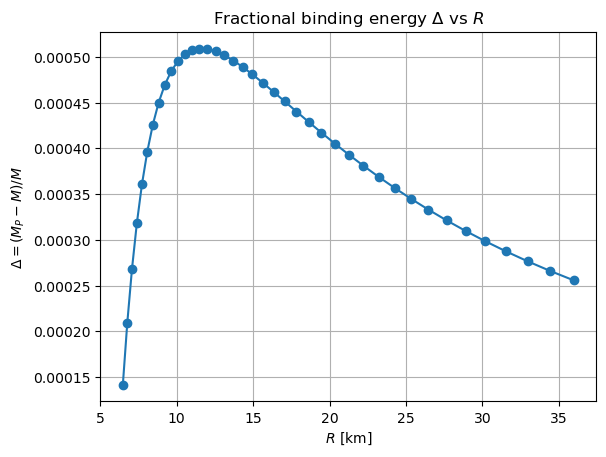

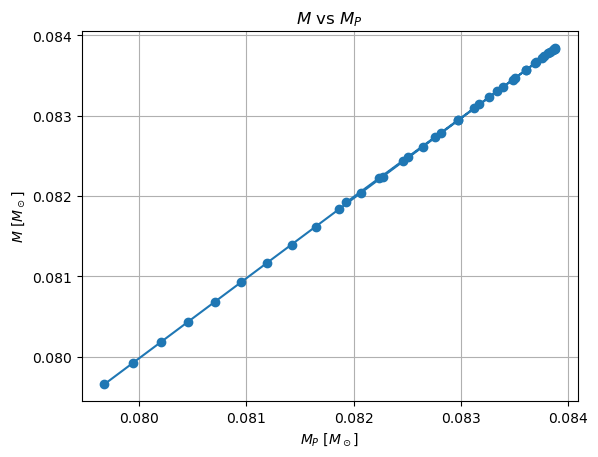

In [41]:
def tov_rhs_with_mp(r, y):
    m, nu, p, mP = y

    if p <= 0.0:
        return [0.0, 0.0, 0.0, 0.0]             # stop region

    rho_r = rho_r_from_p_dimless(p)              # uses your existing inversion
    _, rho = eos_from_rho_r_dimless(rho_r)       # uses your existing EOS

    if r <= 0.0:
        return [0.0, 0.0, 0.0, 0.0]              # regular center

    denom = r * (r - 2.0 * m)
    A = (m + 4.0 * np.pi * r**3 * p) / denom     # common GR factor

    dm  = 4.0 * np.pi * r**2 * rho
    dnu = 2.0 * A
    dp  = -(rho + p) * A

    # Eq. (16): mP' = 4π (1-2m/r)^(-1/2) r^2 ρ_r
    redshift_fac = (1.0 - 2.0 * m / r) ** (-0.5)
    dmP = 4.0 * np.pi * redshift_fac * r**2 * rho_r

    return [dm, dnu, dp, dmP]


def event_p_zero_with_mp(r, y):
    """Same stopping rule with 4 components."""
    return y[2]

event_p_zero_with_mp.terminal = True
event_p_zero_with_mp.direction = -1

# integrate one model
def integrate_star_with_mp(p_c, r_max=50.0):
    """
    Same as our previous integrate_star(), but returns (M, R, MP, Delta).
    """
    r0 = 1e-6                                    # same start as before
    y0 = [0.0, 0.0, p_c, 0.0]                     # m(0)=0, nu(0)=0, p(0)=pc, mP(0)=0

    sol = solve_ivp(
        tov_rhs_with_mp,
        t_span=(r0, r_max),
        y0=y0,
        events=event_p_zero_with_mp,
        rtol=1e-8,
        atol=1e-10,
        max_step=0.05
    )

    if sol.status != 1 or len(sol.t_events[0]) == 0:
        return np.nan, np.nan, np.nan, np.nan

    R  = sol.t_events[0][0]
    M  = sol.y_events[0][0][0]
    MP = sol.y_events[0][0][3]

    Delta = (MP - M) / M                          # Eq. (17)
    return M, R, MP, Delta

# sweep + plots
Ms2, Rs2, MPs2, Deltas2 = [], [], [], []

for p_c in p_c_grid:                              # uses our existing grid
    M, R, MP, Delta = integrate_star_with_mp(p_c, r_max=80.0)
    Ms2.append(M)
    Rs2.append(R)
    MPs2.append(MP)
    Deltas2.append(Delta)

Ms2 = np.array(Ms2)
Rs2 = np.array(Rs2)
MPs2 = np.array(MPs2)
Deltas2 = np.array(Deltas2)

R_km2 = Rs2 * r_unit / 1e3                        # uses our existing r_unit
mask2 = np.isfinite(Ms2) & np.isfinite(MPs2) & np.isfinite(R_km2) & np.isfinite(Deltas2)

# Plot Δ vs R
plt.figure()
plt.plot(R_km2[mask2], Deltas2[mask2], marker="o", linestyle="-")
plt.xlabel(r"$R\ \mathrm{[km]}$")
plt.ylabel(r"$\Delta = (M_P - M)/M$")
plt.title(r"Fractional binding energy $\Delta$ vs $R$")
plt.grid(True)
plt.show()

# Plot M vs MP
plt.figure()
plt.plot(MPs2[mask2], Ms2[mask2], marker="o", linestyle="-")
plt.xlabel(r"$M_P\ [M_\odot]$")
plt.ylabel(r"$M\ [M_\odot]$")
plt.title(r"$M$ vs $M_P$")
plt.grid(True)
plt.show()


### c.1: Stability from $M$ vs $\rho_{c}$

For each model in the sequence, define the central total density $\rho_c \equiv \rho(r=0)$ and the total mass
$M \equiv m(R)$. A simple (turning-point) stability criterion is
$$
\frac{dM}{d\rho_c}>0 \;\;\Rightarrow\;\; \text{stable}, 
\qquad
\frac{dM}{d\rho_c}<0 \;\;\Rightarrow\;\; \text{unstable}.
$$
The maximum allowed NS mass for a given EOS occurs at the turning point where
$$
\frac{dM}{d\rho_c}=0,
$$
i.e. at the cusp/peak of the $M(\rho_c)$ curve; this separates the stable and unstable branches. 
Plotting the $M\!-\!R$ curve with the two branches distinguished (e.g. solid vs dashed) visualizes which
configurations are stable.

From the numerical $M(\rho_c)$ curve, the maximal neutron-star mass allowed by this EOS is
$$
M_{\max} \simeq 0.08384\,M_\odot,
$$
which occurs at
$$
\rho_c \simeq 1.11\times 10^{18}\ \mathrm{kg/m^3}, 
\qquad
R(\rho_c)\simeq 11.49\ \mathrm{km}.
$$
This peak is the turning point where $dM/d\rho_c=0$, separating the stable branch ($dM/d\rho_c>0$) from the
unstable branch ($dM/d\rho_c<0$).

If we used the baryonic mass $M_P$ instead of $M$, we would see the same qualitative behavior (a maximum/turning
point and a stable/unstable split) because $M$ and $M_P$ are computed from the $\emph{same}$ one-parameter family of
equilibrium solutions labeled by $\rho_c$ (or $p_c$). The cusp found previously in the $M$-$M_P$ plot indicates
that along this sequence both masses develop extrema at the same turning point, so replacing $M$ by $M_P$ yields
similar turning-point (cusp) features and hence similar stability conclusions.



M_max [M_sun] = 0.083837278448681
rho_c at M_max [kg/m^3] = 1.107857762013828e+18
R at M_max [km] = 11.48585554728309


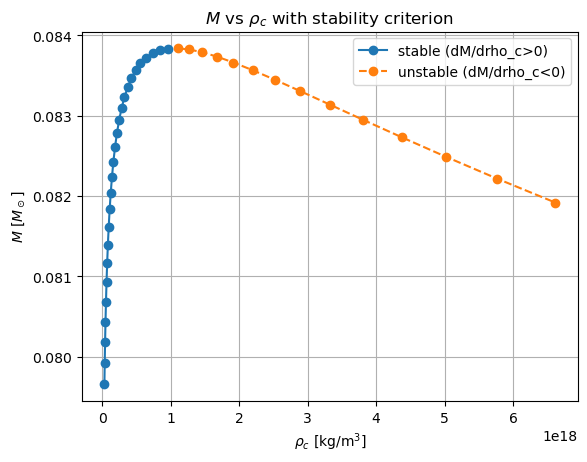

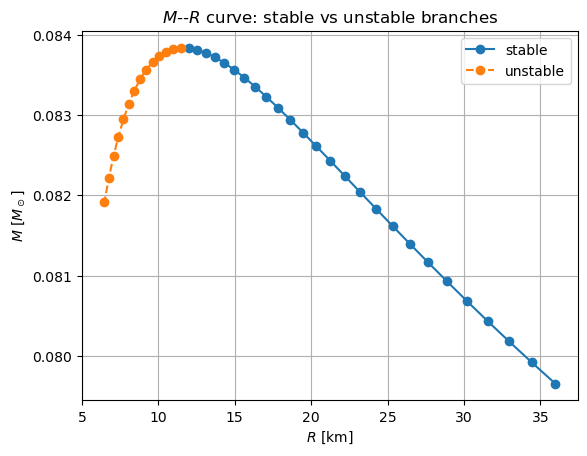

In [ ]:
rho_r_c_dimless_grid = rho_r_c_SI_grid * rho_to_dimless          # rest-mass density at center (dimensionless)
rho_c_dimless_grid = np.array([eos_from_rho_r_dimless(rr)[1] for rr in rho_r_c_dimless_grid])  # total rho_c (dimensionless)
rho_c_SI_grid = rho_c_dimless_grid / rho_to_dimless              # total rho_c in kg/m^3

# Keep only successful models
mask_ok = np.isfinite(Ms2) & np.isfinite(Rs2) & np.isfinite(rho_c_SI_grid)

M_ok = Ms2[mask_ok]                                              # M in M_sun units (dimensionless mass)
R_ok = Rs2[mask_ok]                                              # R in dimensionless length
rho_c_ok = rho_c_SI_grid[mask_ok]                                 # rho_c in kg/m^3

# Sort by rho_c (monotonic ordering for numerical derivative)
idx = np.argsort(rho_c_ok)
rho_c_ok = rho_c_ok[idx]
M_ok = M_ok[idx]
R_ok = R_ok[idx]

# stability via dM/drho_c 
dM_drho = np.gradient(M_ok, rho_c_ok)                  # numerical dM/d rho_c
stable = dM_drho > 0.0
unstable = ~stable

# Maximum mass (turning point / cusp) from M(rho_c)
i_max = np.nanargmax(M_ok)
M_max = M_ok[i_max]
rho_c_at_max = rho_c_ok[i_max]
R_at_max_km = (R_ok[i_max] * r_unit) / 1e3

print("M_max [M_sun] =", M_max)
print("rho_c at M_max [kg/m^3] =", rho_c_at_max)
print("R at M_max [km] =", R_at_max_km)

# plot M vs rho_c 
plt.figure()
plt.plot(rho_c_ok[stable],   M_ok[stable],   marker="o", linestyle="-", label="stable (dM/drho_c>0)")
plt.plot(rho_c_ok[unstable], M_ok[unstable], marker="o", linestyle="--", label="unstable (dM/drho_c<0)")
plt.xlabel(r"$\rho_c\ \mathrm{[kg/m^3]}$")
plt.ylabel(r"$M\ [M_\odot]$")
plt.title(r"$M$ vs $\rho_c$ with stability criterion")
plt.grid(True)
plt.legend()
plt.show()

# plot of M-R with stable/unstable arms differently 
R_ok_km = (R_ok * r_unit) / 1e3

plt.figure()
plt.plot(R_ok_km[stable],   M_ok[stable],   marker="o", linestyle="-",  label="stable")
plt.plot(R_ok_km[unstable], M_ok[unstable], marker="o", linestyle="--", label="unstable")
plt.xlabel(r"$R\ \mathrm{[km]}$")
plt.ylabel(r"$M\ [M_\odot]$")
plt.title(r"$M$--$R$ curve: stable vs unstable branches")
plt.grid(True)
plt.legend()
plt.show()


### d.1: Vary K & Compute $M_max(K)$ with constrain K

Keeping $\Gamma$ fixed, changing $K$ changes the stiffness of the EOS $p=K\rho_r^\Gamma$:
larger $K$ gives larger pressure at a given density and therefore supports a larger maximal mass.
For each chosen $K$, generate a one-parameter sequence of TOV solutions by sweeping the central density (or $p_c$),
compute $M(\rho_c)$, and record
$$
M_{\max}(K)=\max_{\rho_c} M(\rho_c),
$$
i.e. turning point where $dM/d\rho_c=0$.
Plot $M_{\max}(K)$ versus $K$.

Since a neutron star with $M\simeq 2.5\,M_\odot$ is observed, the EOS must satisfy
$$
M_{\max}(K)\ge 2.5\,M_\odot.
$$
Thus, the allowed values of $K$ are precisely those for which the computed $M_{\max}(K)$ curve lies at or above
$2.5\,M_\odot$ (typically a lower bound on $K$, because increasing $K$ increases $M_{\max}$).

From the computed curve $M_{\max}(K)$ (with $\Gamma$ fixed), the observational requirement that neutron stars exist
with $M\simeq 2.5\,M_\odot$ implies
$$
M_{\max}(K)\ \ge\ 2.5\,M_\odot .
$$
Reading off the threshold crossing from our numerical results gives the lower bound
$$
K \ \ge\ K_{\min}\ \simeq\ 3.85\times 10^{9}\ \text{(SI units)},
$$
equivalently, in terms of the fiducial value $K_0$ used in parts (a-c),
$$
\frac{K}{K_0}\ \ge\ 12.59 .
$$
Thus, based on the $2.5\,M_\odot$ observation alone, the allowed values of $K$ are all $K$ above this bound.

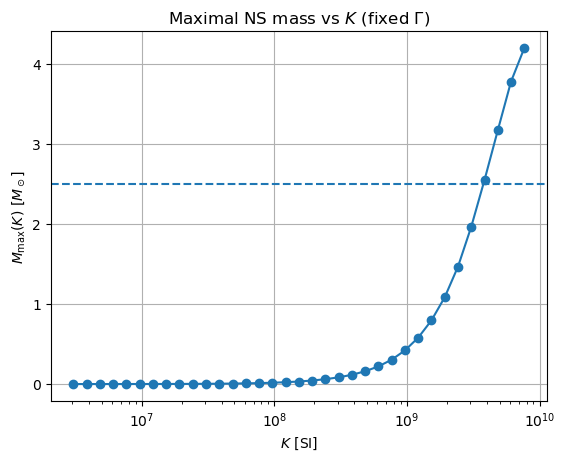

Allowed K (within scanned range) satisfies: K >= 3.847647e+09 (SI units)
i.e. K/K0 >= 12.5893


In [43]:
def integrate_star_paramK(p_c, K_use, r_max=80.0):
    """
    NEW integrator for a given central pressure p_c (dimensionless) and EOS constant K_use (dimensionless).
    State: y=[m, nu, p]
    """
    def rho_r_from_p_local(p):
        if p <= 0.0:
            return 0.0
        return (p / K_use) ** (1.0 / Gamma)

    def rho_from_rho_r_local(rho_r):
        return rho_r + (K_use / (Gamma - 1.0)) * rho_r**Gamma

    def rhs(r, y):
        m, nu, p = y
        if p <= 0.0:
            return [0.0, 0.0, 0.0]
        if r <= 0.0:
            return [0.0, 0.0, 0.0]

        rho_r = rho_r_from_p_local(p)
        rho = rho_from_rho_r_local(rho_r)

        denom = r * (r - 2.0 * m)
        A = (m + 4.0 * np.pi * r**3 * p) / denom

        dm  = 4.0 * np.pi * r**2 * rho
        dnu = 2.0 * A
        dp  = -(rho + p) * A
        return [dm, dnu, dp]

    r0 = 1e-6
    y0 = [0.0, 0.0, p_c]

    sol = solve_ivp(
        rhs,
        t_span=(r0, r_max),
        y0=y0,
        events=event_p_zero,          # reuse your existing event: returns y[2]
        rtol=1e-8,
        atol=1e-10,
        max_step=0.05
    )

    if sol.status != 1 or len(sol.t_events[0]) == 0:
        return np.nan, np.nan

    R = sol.t_events[0][0]
    M = sol.y_events[0][0][0]
    return M, R


def Mmax_for_K_SI(K_SI_value, rho_r_c_SI_grid_local):
    """
    Compute M_max for a given K in SI units, by sweeping central rest-mass density grid (SI).
    Returns (M_max, R_at_Mmax_km)
    """
    K_dimless_use = (p_to_dimless * K_SI_value) / (rho_to_dimless**Gamma)

    rho_r_c_dimless = rho_r_c_SI_grid_local * rho_to_dimless
    p_c_grid_local = K_dimless_use * rho_r_c_dimless**Gamma

    Ms_loc, Rs_loc = [], []
    for p_c in p_c_grid_local:
        M, R = integrate_star_paramK(p_c, K_dimless_use, r_max=80.0)
        Ms_loc.append(M)
        Rs_loc.append(R)

    Ms_loc = np.array(Ms_loc)
    Rs_loc = np.array(Rs_loc)
    ok = np.isfinite(Ms_loc) & np.isfinite(Rs_loc)
    if not np.any(ok):
        return np.nan, np.nan

    i = np.nanargmax(Ms_loc[ok])
    M_max = Ms_loc[ok][i]
    R_max_km = (Rs_loc[ok][i] * r_unit) / 1e3
    return M_max, R_max_km


# choose K-grid and make Mmax(K) plot 
K0_SI = K_SI

K_factors = np.logspace(-2, 2, 41)                # 0.01 ... 100 times the fiducial K
K_SI_grid = K0_SI * K_factors

# Reuse your existing rho_r_c_SI_grid
rho_r_c_SI_grid_local = rho_r_c_SI_grid

Mmax_grid = []
R_at_Mmax_grid = []
for K_val in K_SI_grid:
    Mmax, Rm = Mmax_for_K_SI(K_val, rho_r_c_SI_grid_local)
    Mmax_grid.append(Mmax)
    R_at_Mmax_grid.append(Rm)

Mmax_grid = np.array(Mmax_grid)
R_at_Mmax_grid = np.array(R_at_Mmax_grid)

okK = np.isfinite(Mmax_grid)

plt.figure()
plt.plot(K_SI_grid[okK], Mmax_grid[okK], marker="o", linestyle="-")
plt.axhline(2.5, linestyle="--")                  # observed ~2.5 Msun threshold
plt.xscale("log")
plt.xlabel(r"$K\ \mathrm{[SI]}$")                  # (same SI units as your K_SI)
plt.ylabel(r"$M_{\max}(K)\ [M_\odot]$")
plt.title(r"Maximal NS mass vs $K$ (fixed $\Gamma$)")
plt.grid(True)
plt.show()

# infer allowed K from Mmax(K) >= 2.5 Msun
target = 2.5
K_allowed = K_SI_grid[okK][Mmax_grid[okK] >= target]

if len(K_allowed) == 0:
    print("No K in the scanned range yields M_max >= 2.5 Msun. Expand K_factors range.")
else:
    print("Allowed K (within scanned range) satisfies: K >= {:.6e} (SI units)".format(np.min(K_allowed)))
    print("i.e. K/K0 >= {:.6g}".format(np.min(K_allowed) / K0_SI))


### e.1: Solution for $\nu$

For $r>R$ there is no matter, so $p(r)=0$ and $m(r)=m(R)\equiv M$ are constant. The remaining TOV/metric equation is
$$
\nu'(r)=\frac{2M}{r(r-2M)},\qquad (r>R).
$$
Integrating from $R$ to $r$ gives
$$
\nu(r)-\nu(R)=\int_R^r \frac{2M}{\tilde r(\tilde r-2M)}\,d\tilde r
= \int_R^r\left(\frac{-1}{\tilde r}+\frac{1}{\tilde r-2M}\right)d\tilde r
= \ln\!\left(\frac{r-2M}{r}\right)-\ln\!\left(\frac{R-2M}{R}\right).
$$
Since $\ln\!\left(\frac{r-2M}{r}\right)=\ln\!\left(1-\frac{2M}{r}\right)$, we obtain
$$
\nu(r>R)=\ln\!\left(1-\frac{2M}{r}\right)-\ln\!\left(1-\frac{2M}{R}\right)+\nu(R)
$$
